<a href="https://colab.research.google.com/github/shaifali1102/Supervised-Learning/blob/main/K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors

- supervised ML Algo
- classification + regression
- operates on principles of similarity
- Distance metrics: Euclidean, Manhattan, Minowski



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#blink-it data
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [14]:
df = pd.read_csv("drive/MyDrive/ColabNotebooks/Supervised Learning/blinkit-data.csv")
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**Data Description**

|feature|Description|
|-|-|
|**Region**|where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)|
|**Fresh**|purchase history of Fresh food|
|**Milk**|purchase history of milk product|
|**Grocery**|purchase history of Grocery|
|**Frozen**|purchase history of Frozen food|
|**Detergents_Paper**|purchase history of washing products|
|**Delicassen**|purchase history of imported products, cooked meat|
|**class**|Store catgeory based on demand on products|





In [15]:
df.shape

(440, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<Axes: xlabel='class', ylabel='count'>

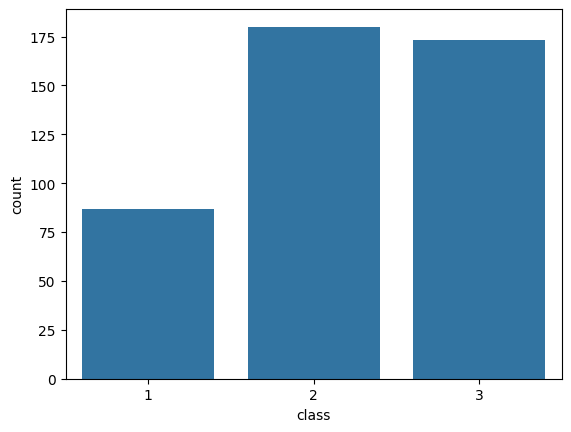

In [18]:
sns.countplot(data = df, x = "class")

In [81]:
# Train-Test Data
X = df.loc[:,~df.columns.isin(["class"])]
y = df[["class"]]

print(X.shape)
print(y.shape)

(440, 7)
(440, 1)


## 1. Manual KNN Implementation

In [82]:
# 1. Feature Reduction - PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
print(X_new.shape)

(440, 2)


               f1            f2  y
0      650.022124   1585.519090  2
1    -4426.804978   4042.451509  2
2    -4841.998705   2578.762176  2
3      990.346438  -6279.805996  1
4    10657.998733  -2159.725815  1
..            ...           ... ..
435  20140.848495   6306.877227  2
436  25912.249946 -11757.647107  2
437   4555.115001  26201.758603  2
438  -2734.370919  -7070.775335  3
439 -10370.125313  -6161.464908  3

[440 rows x 3 columns]


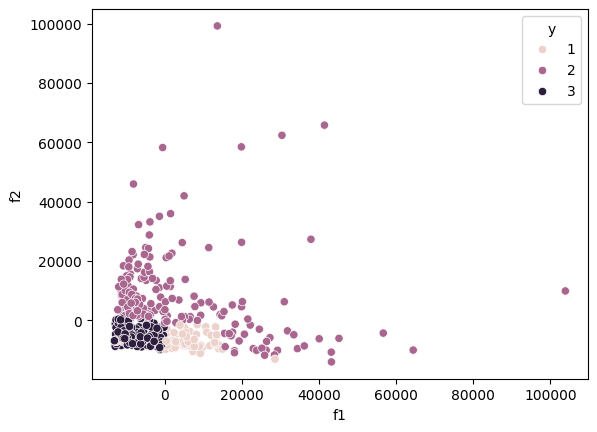

In [83]:
df2 = pd.DataFrame(X_new, columns = ['f1','f2'])
df2['y'] = y
print(df2)
sns.scatterplot(data=df2, x = 'f1', y = 'f2', hue='y')
plt.show()

There's a pattern of purchase between the three class of customers.

In [80]:
##print(y)
#print(df["class"], df[["class"]])
print((df[["class"]]).values[:,0])
#print(type(df["class"]), type(df[["class"]]))

[2 2 2 1 1 3 3 2 3 2 2 2 2 2 2 3 2 3 2 3 1 3 2 2 2 2 3 1 2 2 2 3 1 2 3 2 2
 2 2 2 1 1 2 2 2 2 2 2 2 2 3 3 2 2 1 3 2 2 1 3 3 2 3 2 3 2 3 2 3 3 1 2 3 1
 2 1 3 2 3 3 3 2 2 1 3 2 2 2 3 1 3 1 2 1 2 3 3 3 3 3 2 2 2 2 1 1 2 2 2 2 3
 2 1 1 1 3 3 3 1 3 1 3 3 2 2 2 1 2 3 2 3 3 1 3 3 3 2 2 1 3 1 2 2 3 1 2 3 3
 3 2 1 3 1 3 3 2 2 1 2 2 2 3 1 2 2 2 2 3 1 3 2 2 3 2 3 2 2 1 3 3 2 2 2 2 3
 3 1 2 2 2 1 1 3 2 3 1 2 2 3 3 2 2 2 3 3 2 1 3 3 2 1 2 3 3 2 2 2 1 2 3 1 2
 3 3 3 3 2 3 3 3 3 3 1 3 1 3 3 1 3 2 1 1 1 3 2 2 3 1 1 3 3 2 3 2 2 2 3 3 2
 2 3 3 1 3 2 2 2 1 2 1 3 3 3 2 3 3 2 3 3 2 3 2 2 1 2 2 3 1 1 1 3 3 3 2 1 3
 1 3 2 3 1 2 2 2 2 2 2 1 3 2 3 2 2 3 3 2 3 3 3 2 3 3 1 2 1 2 3 3 1 3 3 2 1
 2 1 2 1 3 3 3 2 2 3 2 3 3 2 2 3 2 3 2 1 2 1 3 1 2 2 3 1 3 3 3 1 2 3 3 1 3
 2 1 3 2 3 3 2 2 3 2 1 1 2 3 2 3 3 1 3 3 3 3 3 1 3 3 2 3 3 3 3 2 1 1 1 3 1
 2 3 3 3 3 2 3 3 2 2 2 2 3 2 2 1 1 2 1 2 2 3 3 2 3 1 3 1 2 2 2 3 3]


In [84]:
# 2. Train-Test Split
from sklearn.model_selection import train_test_split

# Train+Val - Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X_new, y.values[:,0], test_size = 0.25, random_state=10)

# Train - Val
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=10)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 2) (247,)
(83, 2) (83,)
(110, 2) (110,)


In [44]:
# 3. Standardization

mu = X_train.mean(axis=0)
sig = X_train.std(axis=0)

print(mu, sig)

X_train = (X_train - mu)/sig
X_val = (X_train - mu)/sig
X_test = (X_test - mu)/sig

[ 331.14981286 -473.21975896] [11629.53105151 10982.06381358]


In [100]:
# 4 . KNN Algorithm

def knn(X, Y, Q, k=4):

  # 1. Calculate Euclidean distance
  dist = np.sqrt(np.sum((X - Q)**2, axis = 1))
  #print("all distances: ", dist[:7])

  # 1.1 Classes for all distances
  distances = [(dist[i],Y[i]) for i in range(len(dist))]
  #print("Distances and classes: ", distances[:7])

  # 2. Sorting the distances
  distances = sorted(distances, key = lambda x:x[0])
  #print('Distance sorted: ', distances[:7])

  # 2.1 Nearest K points
  distances = np.array(distances[:k])
  #print('Distances top k: ', distances)

  # 2.1.1 as np array
  #print('Distances top k as np array: ', np.array(distances))

  # 3. Unique classes
  classes_counts = np.unique(distances[:,1], return_counts=True)
  #print('Class counts: ', classes_counts)

  # 3.1 Predicted class
  pred = classes_counts[0][classes_counts[1].argmax()]

  return int(pred)

# 5. Prediction
print(X_val[10])
print("Predicated Class: ", knn(X_train, y_train, X_val[10]))

[-10255.94595204  -4547.95210821]
Predicated Class:  3


In [86]:
print(y_val[10])

3


Our KNN Algo predicted correctly.

In [103]:
# Testing on Validation data
k_neighbors = 5
def knn_predict(X, K = 5):
  y_pred = []
  for Xq in X:
    pred = knn(X_train, y_train, Xq , k = K)
    y_pred.append(pred)

  accuracy = (y_pred == y_val).sum()/len(y_pred)

  return round(accuracy, 2)*100

print(knn_predict(X_val))

95.0


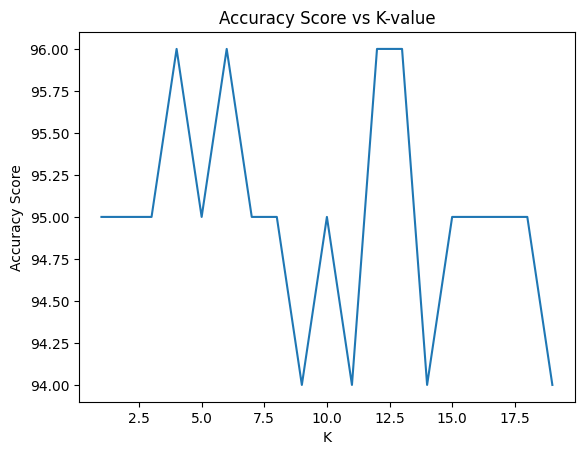

In [115]:
# Hyperparameter Tuning
val_accuracy = []
k = []
for i in range(1,20):
  k.append(i)
  score = knn_predict(X_val, i)
  val_accuracy.append(score)

#print(val_accuracy)

# Plot

sns.lineplot(x=k, y=val_accuracy)
plt.title("Accuracy Score vs K-value")
plt.xlabel("K")
plt.ylabel("Accuracy Score")
plt.show()

K = 4,6,12 and 13 are giving max accuracy score!

we will pick k = 4 for Test Data.

In [117]:
# Test Data
y_pred = []
for Xq in X_test:
  pred = knn(X_train, y_train, Xq , k = 4)
  y_pred.append(pred)

accuracy = (y_pred == y_test).sum()/len(y_pred)

print("Test accuracy is : ", round(accuracy, 2)*100, "%")

Test accuracy is :  99.0 %


### Yay! We got a accuracy of 99% on our test data!

# 2. Sklearn Implementation

In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4) #keeping distance metric as minkowski(default)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [119]:
# Val Data
y_pred = knn.predict(X_val)
knn.score(X_val, y_val)

0.963855421686747

In [120]:
# Test Data
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.990909090909091